<a href="https://colab.research.google.com/github/vcmgbemena/GMC_git/blob/main/Agglo_clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import pandas as pd

data=pd.read_csv("/content/creditcard.csv")
data = data.fillna(data.median())

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')

clust_labels=model.fit_predict(data)

In [8]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
39697,4
39698,4
39699,4
39700,4


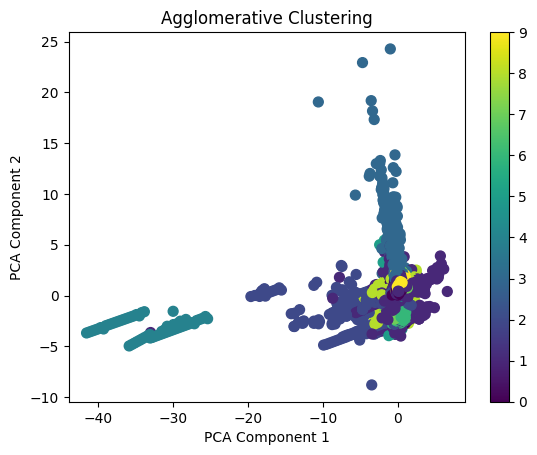

In [10]:

# Assuming 'data' is your dataset containing columns "Time", "V1", ..., "V28", "Amount", and "class"
# We'll select the features to use in clustering (excluding "class" as it's the target variable)
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
            'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=10)  # Choose the number of clusters
clusters = agglomerative.fit_predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111)

# Scatter plot: use PCA components for 2D visualization, and color points by cluster labels
scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, s=50)

# Set title and labels
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")

# Add colorbar to show which color corresponds to which cluster
plt.colorbar(scatter)

# Display the plot
plt.show()
